In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


as per the discussion of kaggle 

In [2]:
data = pd.read_csv('./data/train_rel_2.tsv', sep='\t')
data.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [3]:
data.rename({'EssaySet': 'set'}, axis=1, inplace=True)
data.rename({'Score1': 'score1'}, axis=1, inplace=True)
data.rename({'Score2': 'score2'}, axis=1, inplace=True)
data.rename({'EssayText': 'text'}, axis=1, inplace=True)
data.rename({'Id': 'id'}, axis=1, inplace=True)

In [4]:
#preprocessing the train data

text_to_word = data['text']
text_to_word = text_to_word.apply(lambda x: text_to_word_sequence(x, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' '))
text_to_word = text_to_word.apply(lambda x: " ".join(x))
text_to_word = text_to_word.apply(lambda x: x.strip())
data['text'] = text_to_word

In [5]:
data.head(2)

,id,set,score1,score2,text
0,1,1,1,1,some additional information that we would need...
1,2,1,1,1,after reading the expirement i realized that t...


In [6]:
data.describe()

,id,set,score1,score2
count,17043.000000,17043.000000,17043.000000,17043.000000
mean,13820.561286,5.609576,0.926245,0.923898
std,8256.441258,2.822468,0.893137,0.892348
min,1.000000,1.000000,0.000000,0.000000
25%,6275.500000,3.000000,0.000000,0.000000
50%,14270.000000,6.000000,1.000000,1.000000
75%,20928.500000,8.000000,2.000000,2.000000
max,27588.000000,10.000000,3.000000,3.000000


Text(0.5, 1.0, 'Frequency of each question sets')

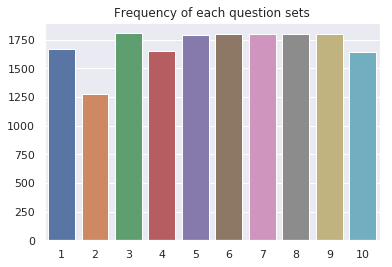

In [7]:
cnt = data['set'].value_counts()
sns.barplot(list(cnt.index), cnt.values)
plt.title('Frequency of each question sets')

Text(0.5, 0.98, 'Scores histogram')

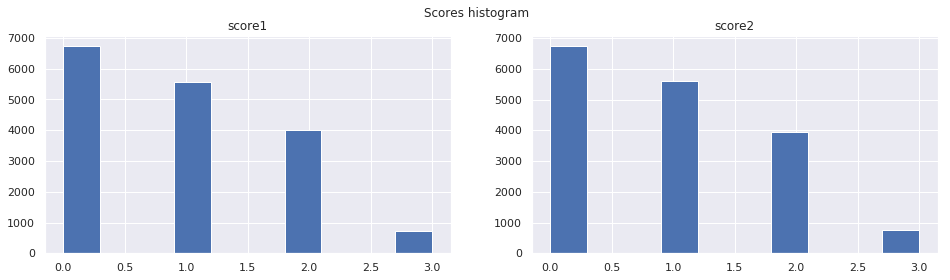

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].hist(data['score1'])
ax[0].set_title('score1')
ax[1].hist(data['score2'])
ax[1].set_title('score2')
fig.suptitle('Scores histogram')

In [9]:
# no of words in text
text_len = data['text'].apply(lambda x: len(x.split()))
text_len.describe()

count    17043.000000
mean        42.576424
std         27.528521
min          1.000000
25%         23.000000
50%         39.000000
75%         57.000000
max        327.000000
Name: text, dtype: float64

In [10]:
# no of chars in text
text_len = data['text'].apply(len)
text_len.describe()

count    17043.000000
mean       231.067359
std        147.917082
min          1.000000
25%        124.000000
50%        213.000000
75%        311.000000
max       1766.000000
Name: text, dtype: float64

In [11]:
data.shape

(17043, 5)

In [12]:
#score1 == score2
(data.score1 ==data.score2).sum()

15000

as there are 2 sources for score and the test file has only one score we need ony one score for that I will take score 1 as it is mentioned in every set description that final score is score 1, Score 2 is for inter-rater reliability purposes. 

In [13]:
#averaging and rounding off the scores and saving the file as tsv->csv
data["score"] = data.apply(lambda x:x.score1,axis=1)

In [14]:
new_data = pd.DataFrame()

In [15]:
new_data['id'] = data.id
new_data['set'] = data.set
new_data['score'] = data.score
new_data['text'] = data.text

In [16]:
text_to_word = new_data['text']
text_to_word = text_to_word.apply(lambda x: text_to_word_sequence(x, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' '))
text_to_word = text_to_word.apply(lambda x: " ".join(x))
text_to_word = text_to_word.apply(lambda x: x.strip())
new_data['text'] = text_to_word

In [17]:
new_data.head()

,id,set,score,text
0,1,1,1,some additional information that we would need...
1,2,1,1,after reading the expirement i realized that t...
2,3,1,1,what you need is more trials a control set up ...
3,4,1,0,the student should list what rock is better an...
4,5,1,2,for the students to be able to make a replicat...


In [18]:
new_data.to_csv("./data/train.csv",index=False)

In [19]:
data = pd.read_csv("./data/train.csv")

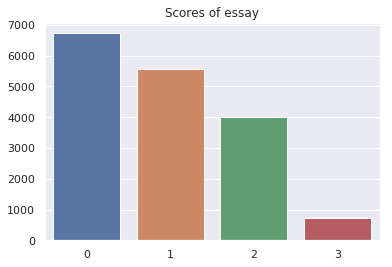

In [20]:
cnt = data['score'].value_counts()
sns.barplot(list(cnt.index), cnt.values)
plt.title('Scores of essay');

In [21]:
data.head()

,id,set,score,text
0,1,1,1,some additional information that we would need...
1,2,1,1,after reading the expirement i realized that t...
2,3,1,1,what you need is more trials a control set up ...
3,4,1,0,the student should list what rock is better an...
4,5,1,2,for the students to be able to make a replicat...


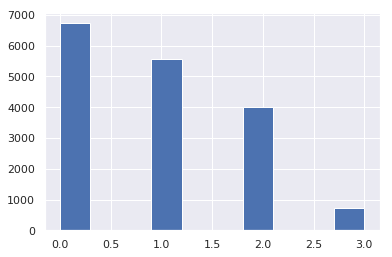

In [22]:
#visualizing the score distribution which is actually the score1 of the dataset
plt.hist(data.score);

In [23]:
X = data['text']
X_set = data['set']
y = data['score']

/home/ekansh/anaconda3/envs/capstone/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


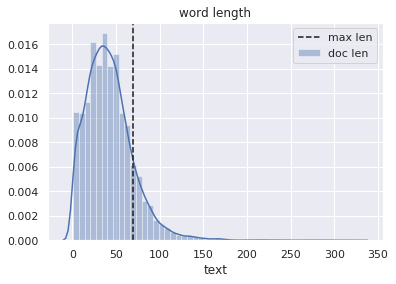

In [24]:
#visualize word distribution
doc_len = X.apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(doc_len.mean() + doc_len.std()).astype(int)
sns.distplot(doc_len, hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('word length'); plt.legend()
plt.show()

data is almost normally distributed but a bit right skewed

formatting test.csv to get evaluation scores

In [25]:
test_file = pd.read_csv('./data/public_leaderboard_rel_2.tsv',sep='\t')
test_sol = pd.read_csv('./data/public_leaderboard_solution.csv')

In [26]:
test_sol = test_sol.drop(["Usage"],axis=1)
test_sol = test_sol.drop(["essay_weight"],axis=1)
test_sol.rename({'essay_set': 'set'}, axis=1, inplace=True)
test_sol.rename({'essay_score': 'score'}, axis=1, inplace=True)

In [27]:
test_sol['text'] = test_sol.apply(lambda x:test_file.iloc[np.argmax(test_file.Id == x.id)].EssayText,axis=1)
text_to_word = test_sol['text']
text_to_word = text_to_word.apply(lambda x: text_to_word_sequence(x, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' '))
text_to_word = text_to_word.apply(lambda x: " ".join(x))
text_to_word = text_to_word.apply(lambda x: x.strip())
test_sol['text'] = text_to_word

/home/ekansh/anaconda3/envs/capstone/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [28]:
test_sol.head()

,id,set,score,text
0,1673,1,1,the procedures i think they should have includ...
1,1674,1,1,in order to replicate this experiment you woul...
2,1675,1,3,in order to replicate their experiment you wou...
3,1676,1,0,pleace a simple of one material into one conta...
4,1677,1,0,determin the mass of four different samples ma...


In [29]:
test_sol.to_csv("./data/test.csv",index=False)

In [30]:
import json
import os
import errno
import argparse
from preprocess import preprocess
from model import save_model, restore_model, create_model
from train import val_split, fit_model, plot_model_history
from test import test

In [31]:
np.random.seed(0)
import nltk
#nltk.download('stopwords')

In [32]:
def train_main():
    with open('config.json') as f:
        args = json.load(f)

    # make save folder
    try:
        print('Creating checkpoint folder...')
        os.makedirs(args['save_folder'])
    except OSError as e:
        if e.errno == errno.EEXIST:
            print('Directory already exists.')
        else:
            raise
    # read and preprocess data
    train_data = pd.read_csv(args['train_path'])
    preprocessed_train = preprocess(train_data, args)

    if args['train_model_weights']: # resume training
        model = restore_model(args['save_folder'], args['train_model_weights'])
    else:
        model = create_model(args)
        save_model(model, args['save_folder'])
    # split data for CV
    train_set, val_set = val_split(*preprocessed_train[0], preprocessed_train[1])

    model, history = fit_model(model, train_set, val_set, args)
    plot_model_history(history, args['save_folder'])
    
def test_main():
    with open('config.json') as f:
        args = json.load(f)

    # read and preprocess data
    test_data = pd.read_csv(args['test_path'])
    test_data.drop('id', axis=1, inplace=True)
    preprocessed_test = preprocess(test_data, args, False)

    # load checkpoint
    model = restore_model(args['save_folder'], args['test_model_weights'])
    model.compile(loss='mse', optimizer='adam')  # only for evaluation

    test(model, preprocessed_test, args, True)

Train

In [33]:
#train_main()

In [34]:
test_main()

100%|██████████| 5224/5224 [00:00<00:00, 43312.22it/s]

pre-processing input data...
Tokenizing input data...


Restored tokenizer
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Restored model
5224/5224 [==============================] - 6s 1ms/step
Accuracy:  0.6715160796324655
Test loss:  0.3291973997631993
Logged predictions


In [35]:
from evaluate import *

In [36]:
output = pd.read_csv('outputs.csv')

qwp = quadratic_weighted_kappa(output['output'], output['target'])
mqwp = calc_mqwp(output)

print('Quadratic weighted average: ', qwp)
print('Mean quadratic weighted average: ', mqwp)

Kappa of each set:  [0.683048721769597, 0.6434099810723186, 0.5452584418816893, 0.5798385820541224, 0.7529532614278377, 0.7581331235510752, 0.6145028147384023, 0.4830237908763554, 0.6689937463899843, 0.6860240446543581]
Quadratic weighted average:  0.7353943085360921
Mean quadratic weighted average:  0.6490483864725731
